# College Recommendation System
DYLAN SCHWAB




## 1. Project Report

### 1.1 The Problem

In the United States, higher education can be an extremely expensive endeavor, so colleges and universities need to present a value proposition for prospective students. But, how do they determine which schools offer the best value? In this report I will utilize data analytics to summarize information and present it to prospective students so they can make an informed decision.

Based upon a dataset describing features of U.S. schools, the goal of this report is to develop a program to help students decide which schools offer the best value, taking into consideration student academic performance, school preferences, and budgets.

First, I define expense and academic performance using features of the dataset. Then, I create a rating system that ranks these features against every other university in the country. Finally, after acquiring user preferences and constraints like location, budget, and standardized test score performance, I report:
- which universities provide the best education for the price
- which universities deliver the highest academic performance, regardless of cost 
- the odds that a student could be admitted into these universities, based on their test scores

### 1.2 Definitions

To begin, I identify features within the dataset that are reasonable approximations of "Academic Performance" or "Value", which are used as a basis for the determining which schools offer the best value. 

There are four key concepts that I examine: Academic performance of the school, expense, value (comparison of academic performance and expense), and students' odds of admission (based on their test scores). 

**Academic Performance:** 

Academic performance is the measurement of a university's academic achievement. This could be directly measured by students' grades, classroom performance, or students' post-graduate job placement. This dataset does *not* include this information, so we must define performance through other indirect features.

These are the useful features that included in this dataset:
+ ACT Composite 75th percentile score
+ SAT 75th percentile score for Critical Reading, Writing, Math
+ Graduation rate - Bachelor degree within 6 years, total

These features, combined, provide an indication of a school's overall academic performance. 

**Expense:**

Defining expense is more straightforward. The expense of a university is the financial cost of attendance. The relevant features from this dataset are:
+ Tuition and fees, 2013-14
+ Total price for in-state students living on campus 2013-14
+ Total price for out-of-state students living on campus 2013-14

**Value:** 

Value is the measure the performance of a university vs. the financial cost of attending. For example, some private schools offer excellent performance, but cost four times more than similarly performing public universities. In this case, one could say that that the public university offers a better value for the money. A high performing university with an expensive tuition cost would have an average value rating, but a low performing university with a high tuition cost would have a bad value rating.

The relationship plot below shows the performance of all schools relative to their expense:

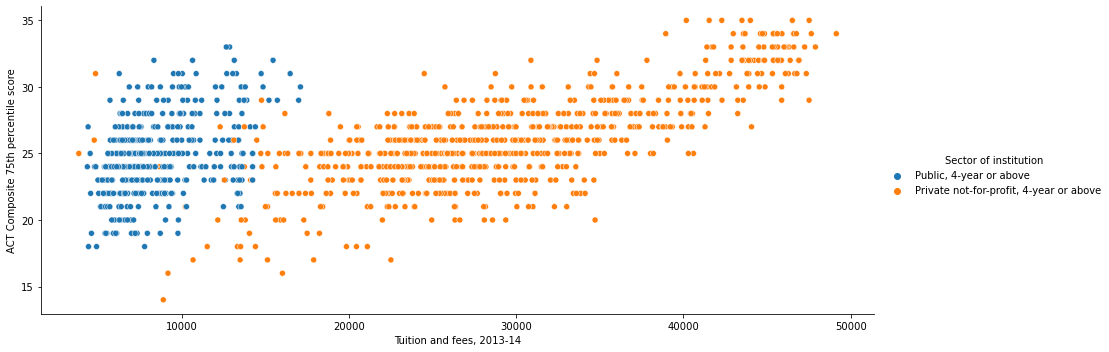

In [19]:
seaborn.relplot(data=df, x="Tuition and fees, 2013-14", y="ACT Composite 75th percentile score", hue="Sector of institution", aspect=2.5)

**Odds of Admisson:**

Just because a student might be able to afford to attend a university does not mean that they will be able to attend. Schools can only admit a certain number of students per year, and they choose those students based on many factors, including standardized test scores.

The dataset includes these relevant features:
+ ACT Composite 25th and 75th percentile score
+ SAT 25th and 75th percentile score for Critical Reading, Writing, Math

For this report, the user is asked to report which test they took and the cumulative score that they received. This score is compared to a school's 25th and 75th percentile scores, and the user is assigned their 'Odds of Admission' as follows:

+ **Very Low:** < 25th Percentile Score / 2
+ **Low:** < 25th Percentile Score
+ **Fair:** < 75th Percentile Score - (75th Percentile Score - 25th Percentile Score) / 2
+ **Good:** < 75th Percentile Score
+ **Very Good:** >= 75th Percentile Score

### 1.3 Determining Value

Determining which schools offer the best education for the money, necessitates the creation of standardized numerical scores of a school's

+ Academic Performance
+ Expense
+ Value (which is derived from Performance and Expense)

**Academic Performance Score and Rating**

To determine a school's academic performance, we will use the features noted in section 3.2. Each feature will be processed by a min/max scaler, which scales the data to values between -3 and 3, 0 being the median. Graduation rate is weighed equally with standardized test scores, so the final academic performance score is the sum of the scaled values of:

Academic Performance = (SAT 75th Percentile Score) + (ACT 75th Percentile Score) + 2*(Graduation Rate within 6 years total)

This value is then also scaled, giving each school a performance score between -3 and 3. This score is used to assign a performance rating between Terrible and Excellent, using this scale:

+ **Terrible:** < -2.66
+ **Very Bad:** < -2
+ **Bad:** < -1
+ **Below Average:** < -0.333
+ **Average:** <= 0.333
+ **Above Average:** < 1
+ **Good:** < 2
+ **Very Good:** < 2.66
+ **Excellent:** >= 2.66

**Expense Score and Rating**

The user will select which of the three expense features noted in section 3.2 (i.e., whether they plan to live on-campus and if they prefer attending school in-state) is most relevant for thier circumstances. 

Based on their decision, one of the features is used to determine their expenses. Again, the min/max scaler is used to assign score between -3 and 3 to each school based off their expense, 0 being the median, and a 3 being the most expensive school. 

**Value Score and Rating**

To determine the value score, the expense score we created previously is subtracted from the school's performance score, then processed through the min/max scaler. 

Value = Performance Score - Expense Score

For example, if a school has a high performance score (2.8) and a high expense score (2.8), it will have an average value score (2.8 - 2.8 = 0). However, if a school has high performance score (2.7) and a lower expense score (-1.5), it will end up with a higher value score (2.7 - (-1.5) = 4.2).

This raw value score then processed through the min/max scaler, so that each score is between -3 and 3.

The processed value score is used to assign each school a value rating between Terrible and Excellent, using the scale above.

### 1.4 Recommending a School

The program below receives input on a user's preferences and constraints, including:

+ Which standardized test did the user take?
+ What score did the user receive on the test?
+ Would the user prefer to remain in-state?
+ Would the user prefer to remain in-region?
+ Would the user prefer to attend a small or large university?
+ Would the user prefer to attend a university with a religious affiliation? If so, which affiliation(s)?
+ What is the user's yearly budget?

Once the user has provided enough information, the program will display a relationship plot and two lists of universities matching the user's criteria. The first list ranks schools by value score and the second ranks by performance score. Each university listed is assigned a 'Performance Rating', a 'Value Rating', and the user is shown their 'Odds of Admission.'

Note: For universities that did not provide SAT/ACT score data, the 'Odds of Admission' is nAn or None.

-=+ COLLEGE RECOMMENDER +=-
--- -- - -- --- -- - --- --
To begin, we need some information.
What State do you live in?Tennessee
Did you take the SAT or ACT?
Respond 'SAT' or 'ACT'SAT
What score did you get on the SAT ?
1900
Would you prefer to stay in-state?
'Yes', 'No', or leave blank if you have no preference:Yes
Do you plan on living on campus?
'Yes','No', or leave blank if you have no preference:yes
Small school: < 12,000 students
Large school: >= 12,000 students
If you have a preference, would you prefer to go to a small or a large school?
'Small', 'Large' or leave blank if you have no preference:large
Would you prefer to go to a religious institution? 
'Yes', 'No' or leave blank if you don't have a preference:no
- -- --- -- - TUITION RESULTS - - -- --- -- -
Of the schools available per your criteria, the potential total cost per year (including housing) ranges from:
	$20,818.00 to $61,112.00
What is your maximum budget per year?
Please enter a number (leave blank if you have no b

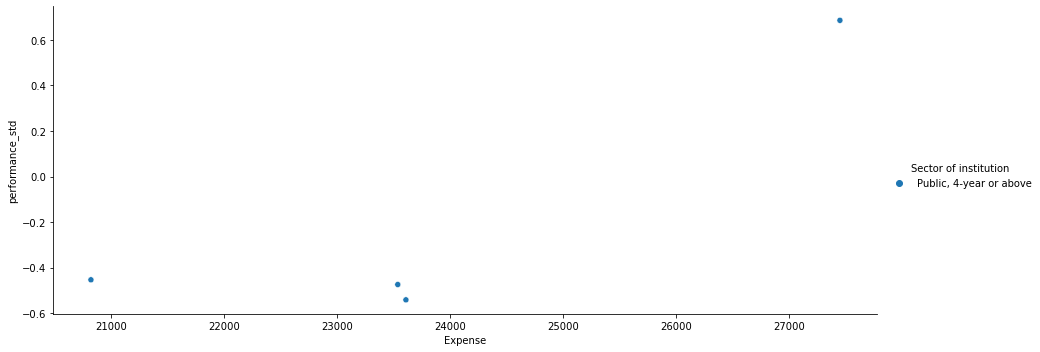

This is a list of the schools that meet your criteria, ranked by value:


,Name,Total Cost per Year (On-Campus/In-State),Performance Rating,Value Rating,Odds of Admission
1250,The University of Tennessee-Knoxville,"$27,450.00",Above Average,Good,None
1243,Middle Tennessee State University,"$20,818.00",Below Average,Above Average,None
1242,University of Memphis,"$23,535.00",Below Average,Above Average,Very Good
1231,East Tennessee State University,"$23,607.00",Below Average,Above Average,nan


This is a list of the schools that meet your criteria, ranked purely on academic performance:


,Name,Total Cost per Year (On-Campus/In-State),Performance Rating,Value Rating,Odds of Admission
1250,The University of Tennessee-Knoxville,"$27,450.00",Above Average,Good,None
1243,Middle Tennessee State University,"$20,818.00",Below Average,Above Average,None
1242,University of Memphis,"$23,535.00",Below Average,Above Average,Very Good
1231,East Tennessee State University,"$23,607.00",Below Average,Above Average,nan


In [21]:
data, user = collegeRecommender(df)

### 1.5 Conclusion

Using this college recommendation program, a prospective college student can find universities which provide the most value for their budget, while also taking into consideration location and other preferences.

However, this recommendation system is neither complete nor perfect. For instance, it does not take into consideration whether or not a school offers the major that a student is interested in, or if the university specializes in certain fields. For instance, Texas A&M, which this program rates as high in both performance and value, is a world renowned university known for specializing STEM fields, but it might not be the best fit for a student who is interested in studying dance or theater.

Furthermore, this recommendation system cannot always give completely accurate results when it comes to 'Odds of Admission', as there are more factors in play than test scores. For example, if you receive a 34 on your ACTs, this recommender gives you 'Good' odds of being admitted to Harvard. Unfortunately, it takes more than good ACT scores to earn admission into highly competetive colleges and universities like Harvard, such as extracurricular activities.

This recommendation system is best used as an investigatory tool, which reduces the large field of universities down to a manageable, readable, ranked list. Thus, it does the initial work of narrowing down the over 1500 colleges and universities within the U.S., providing a useful starting point for prospective college students. 

---
## 2. Reference

In [2]:
import pandas, seaborn
import matplotlib.pyplot as plt
import numpy as np
from uszipcode import SearchEngine
from sklearn.preprocessing import MinMaxScaler
pandas.set_option('mode.chained_assignment', None)
df = pandas.read_csv('college_data.csv')
def add_state(row):
    search = SearchEngine()
    zipcode = search.by_zipcode(row[3][0:5])
    return zipcode.state
df['state'] = df.apply(add_state, axis=1)
States = df['State abbreviation'].unique()
states = list(map(lambda x: x.lower(), States))
ST = df['state'].unique()
statelist = list(zip(states,ST))
regions = df['Geographic region'].unique()

In [3]:
# GETTING USER INFORMATION
def getUserDeetz():
    exit = 0
    while exit == 0:
        userState = input('What State do you live in?').lower()
        if userState in states:
            exit = 1
        else:
            print("That's not a state. Try again.")
    for state in statelist:
        if userState == state[0]:
            userST = state[1]
            break
    for region in regions:
        if userST in region:
            userRegion = region
            break
    exit = 0
    satoract = ('sat', 'act')
    while exit == 0:
        print("Did you take the SAT or ACT?")
        userTest = input("Respond 'SAT' or 'ACT'").lower()
        if userTest in satoract:
            exit = 1
        else:
            print("Invalid input. Try again.")
    exit = 0
    while exit == 0:
        while True:
            print("What score did you get on the", userTest.upper(), "?")
            try:
                userScore = input()
                if userTest == 'sat':
                    if int(userScore) < 0 or int(userScore) > 2400:
                        print("SAT scores range between 0-2400. Try again.")
                    else:
                        exit = 1
                if userTest == 'act':
                    if int(userScore) < 0 or int(userScore) > 36:
                        print("ACT scores range from 0-36")
                    else:
                        exit = 1
            except ValueError:
                print("Invalid input. Try again.")
            else:
                break
    return {'State':userST, 'Region':userRegion, 'Test':userTest, 'Score':userScore}

In [4]:
# RETURN ONLY SCHOOLS IN THE USER'S STATE
def getInState(df, user):
    return df[df['state']==user['State']]

In [5]:
# RETURN ONLY SCHOOLS OUTSIDE THE USER'S STATE
def getOutOfState(df, user):
    return df[df['state'] != user['State']]

In [6]:
# RETURN ONLY SCHOOLS WITHIN THE USER'S REGION
def getInRegion(df, user):
    return df[df['Geographic region']==user['Region']]

In [7]:
# RETURN ONLY SCHOOLS OUTSIDE OF THE USER'S REGION
def getOutOfRegion(df, user):
    return df[df['Geographic region'] != user['Region']]

In [8]:
# RETURN ONLY 'SMALL' SCHOOLS
def getSmall(df, user):
    return df[df['Estimated enrollment, total'] < 12000]

In [9]:
# RETURN ONLY 'LARGE' SCHOOLS
def getBig(df, user):
    return df[df['Estimated enrollment, total'] >= 12000]

In [10]:
# RETURN THE UNIQUE RELIGIOUS AFFILIATIONS OF THE SCHOOLS IN THE DATAFRAME
def getRels(df):
    relSchool = df[df['Religious affiliation'] != 'Not applicable']
    relSchool = relSchool.dropna(subset=['Religious affiliation'])
    rels = relSchool['Religious affiliation'].unique()
    rels = list(rels)
    rels = list(map(str, rels))
    rels = sorted(rels)
    return rels

In [11]:
# RETURN ONLY SCHOOLS WITH NO RELIGIOUS AFFILIATION
def getNoRels(df):
    schools = df[df['Religious affiliation'] == 'Not applicable']
    return schools

In [12]:
# RETURN A RATING BASED ON A SCALED SCORE BETWEEN -3 AND 3
def getRating(n):
    if n < -2.66:
        return 'Terrible'
    elif n < -2:
        return 'Very Bad'
    elif n < -1:
        return 'Bad'
    elif n < -0.333:
        return 'Below Average'
    elif n <= 0.333:
        return 'Average'
    elif n < 1:
        return 'Above Average'
    elif n < 2:
        return 'Good'
    elif n < 2.66:
        return 'Very Good'
    else:
        return 'Excellent'

In [13]:
# RETURN ODDS OF ADMISSION BASED ON ACT SCORE
def getACTOdds(data, user):
    if int(user['Score']) < (data['ACT Composite 25th percentile score'] * 0.5):
        return "Very Low"
    elif int(user['Score']) < data['ACT Composite 25th percentile score']:
        return "Low"
    elif int(user['Score']) < (data['ACT Composite 75th percentile score'] - ((data['ACT Composite 75th percentile score']-data['ACT Composite 25th percentile score'])/2)):
        return "Fair"
    elif int(user['Score']) < data['ACT Composite 75th percentile score']:
        return "Good"
    elif int(user['Score']) >= data['ACT Composite 75th percentile score']:
        return "Very Good"

In [14]:
# RETURN ODDS OF ADMISSION BASED ON SAT SCORE
def getSATOdds(data, user):
    if int(user['Score']) < (data['SAT 25th Total'] * 0.5):
        return "Very Low"
    elif int(user['Score']) < data['SAT 25th Total']:
        return "Low"
    elif int(user['Score']) < (data['SAT 75th Total'] - ((data['SAT 75th Total']-data['SAT 25th Total'])/2)):
        return "Fair"
    elif int(user['Score']) < data['SAT 75th Total']:
        return "Good"
    elif int(user['Score']) >= data['SAT 75th Total']:
        return "Very Good"

In [15]:
def getExtras(data):
# SCALING THE DATA
    scaler = MinMaxScaler(feature_range=(-3,3))
    data['SAT 25th Total'] = (data['SAT Critical Reading 25th percentile score'] + data['SAT Math 25th percentile score'] + data['SAT Writing 25th percentile score'])
    data['SAT 75th Total'] = (data['SAT Critical Reading 75th percentile score'] + data['SAT Math 75th percentile score'] + data['SAT Writing 75th percentile score'])
    data[['expense_std', 'ACT_std', 'SAT_std', 'Grad_std']] = scaler.fit_transform(data[['Expense', 'ACT Composite 75th percentile score', 'SAT 75th Total', 'Graduation rate - Bachelor degree within 6 years, total']])
# FILLING IN BLANKS WITH THE MEDIAN
    data['expense_std'] = data['expense_std'].fillna(0)
    data['ACT_std'] = data['ACT_std'].fillna(0)
    data['SAT_std'] = data['SAT_std'].fillna(0)
    data['Grad_std'] = data['Grad_std'].fillna(0)
# CREATING VALUE, PERFORMANCE FEATURES BASED ON WEIGHTED SUMS OF SCALED FEATURES
    data['value'] = data['ACT_std'] + data['SAT_std'] + 2*data['Grad_std'] - 4*data['expense_std']
    data['performance'] = data['ACT_std'] + data['SAT_std'] + 2*data['Grad_std']
    data['value_std'] = scaler.fit_transform(data[['value']])
    data['performance_std'] = scaler.fit_transform(data[['performance']])
# ASSIGNING A RATING SCALE VALUE AND PERFORMANCE
    data['Value Rating'] = data['value_std'].apply(lambda x: getRating(x))
    data['Performance Rating'] = data['performance_std'].apply(lambda x: getRating(x))
    return data

In [16]:
# RETURN A FORMATTED COPY OF THE DATA WITH FEWER COLUMNS
def getLess(data, user):
    new = data[['Name','Expense','Performance Rating','Value Rating', 'Odds of Admission','performance_std','value_std']]
    new['Expense'] = data['Expense'].apply(lambda x: "${:,.2f}".format(x))
    if user['On-Campus'] == 'yes':
        if user['In-State'] == 'yes':
            new = new.rename(columns={'Expense' : "Total Cost per Year (On-Campus/In-State)"})
        elif user['In-State'] == 'no' or user['In-Region'] == 'no':
            new = new.rename(columns={'Expense' : "Total Cost per Year (On-Campus/Out-Of-State)"})
        else: new = new.rename(columns={'Expense' : 'Tuition & Fees per Year'})
    else:
        new = new.rename(columns={'Expense' : 'Tuition & Fees per Year'})
    return new

In [17]:
# DISPLAY A RELPLOT OF EXPENSE VS PERFORMANCE AND DISPLAY TWO LISTS OF SCHOOLS RANKED BY VALUE AND PERFORMANCE
def displayData(data, user):
    print("This is a relationship plot which displays expense of the universities matching your criteria versus their academic performance.")
    print("Public and private schools are shown in different colors.")
    plot = seaborn.relplot(data=data, x="Expense", y='performance_std', hue='Sector of institution', aspect=2.5)
    plt.show()
    new_data = getLess(data, user)
    print("This is a list of the schools that meet your criteria, ranked by value:")
    display(new_data.sort_values('value_std', ascending=False).style.hide_columns(['performance_std', 'value_std']).set_caption("Ranked by value"))
    print("This is a list of the schools that meet your criteria, ranked purely on academic performance:")
    display(new_data.sort_values('performance_std', ascending=False).style.hide_columns(['performance_std', 'value_std']).set_caption("Ranked by performance"))

In [18]:
def collegeRecommender(data):
    print("-=+ COLLEGE RECOMMENDER +=-")
    print("--- -- - -- --- -- - --- --")
    print("To begin, we need some information.")
    user = getUserDeetz()
    yorn = ('yes','no',"")
# GET IN-STATE PREFERENCE
    exit = 0
    while exit == 0:
        print("Would you prefer to stay in-state?")
        user['In-State'] = input("'Yes', 'No', or leave blank if you have no preference:").lower()
        if user['In-State'] in yorn:
            exit = 1
        else:
            print("Invalid input. Try again.")
# GET REGION PREFERENCE
    if user['In-State'] == 'yes':
        user['In-Region'] = 'yes'
    else:
        exit = 0
        while exit == 0:
            print("Your region is", user['Region'],)
            print("Would you prefer to stay in your current region?")
            user['In-Region'] = input("'Yes','No', or leave blank if you have no preference:").lower()
            if user['In-Region'] in yorn:
                exit = 1
            else:
                print("Invalid input. Try again.")
# GET ON-CAMPUS PREFERENCE
    exit = 0
    while exit == 0:
        print("Do you plan on living on campus?")
        user['On-Campus'] = input("'Yes','No', or leave blank if you have no preference:").lower()
        if user['On-Campus'] in yorn:
            exit = 1
        else:
            ("Invalid input. Try again.")
# GET SMALL OR LARGE PREFERENCE
    exit = 0
    sorl = ('small', 'large',"")
    while exit == 0:
        print("Small school: < 12,000 students")
        print("Large school: >= 12,000 students")
        print("If you have a preference, would you prefer to go to a small or a large school?")
        r_sorl = input("'Small', 'Large' or leave blank if you have no preference:").lower()
        if r_sorl in sorl:
            exit = 1
        else:
            print("Invalid input. Try again.")
# DEFINE EXPENSE AND GET MINMAXSCALER STDS FOR EXPENSE, PERFORMANCE, VALUE
    if user['On-Campus'] == 'yes':
        if user['In-State'] == 'yes':
            data['Expense'] = data['Total price for in-state students living on campus 2013-14']
        elif user['In-State'] == 'no':
            data['Expense'] = data['Total price for out-of-state students living on campus 2013-14']
        else:
            data['Expense'] = data['Tuition and fees, 2013-14']
    else:
        data['Expense'] = data['Tuition and fees, 2013-14']
    getExtras(data)
# NARROW IT DOWN
    if user['In-Region'] == 'yes':
        data = getInRegion(data, user)
    if user['In-Region'] == 'no':
        data = getOutOfRegion(data, user)
    if user['In-State'] == 'yes':
        data = getInState(data, user)
    if user['In-State'] == 'no':
        data = getOutOfState(data, user)
    if r_sorl == 'small':
        data = getSmall(data, user)
    if r_sorl == 'large':
        data = getBig(data, user)
# GET RELIGIOUS PREFERENCES
    exit = 0
    while exit == 0:
        print("Would you prefer to go to a religious institution? ")
        user['Religious'] = input("'Yes', 'No' or leave blank if you don't have a preference:").lower()
        if user['Religious'] in yorn:
            exit = 1
        else:
            ("Invalid input. Try again.")
    if user['Religious'] == 'yes':
        exit = 0
        while exit == 0:
            while True:
                print("These are the religious affiliations of the schools that match your other criteria.")
                rels = getRels(data)
                i = 0
                for r in rels:
                    i += 1
                    print(i,":",r)
                print("Which affiliations would you be open to?")
                try:
                    nums = input("Please answer in a comma seperated list. Example: 1,2,3:").split(",")
                    if len(nums) > 0:
                        user['Affiliations'] = []
                        for n in nums:
                            user['Affiliations'].append(rels[int(n)-1])
                    print("You chose:")
                    print(user['Affiliations'])
                    r_correct = input("Is this correct? 'Yes' or 'No':").lower()
                    if r_correct == 'yes':
                        exit = 1
                        break
                    elif r_correct == 'no':
                        print("Okay. Please try again.")
                    else:
                        print("Invalid input. Try again.")                 
                except(ValueError, IndexError):
                    print("Invalid input. Try again.")
                    
# NARROW IT DOWN FOR RELIGION (IF APPLICABLE)
    if user['Religious'] == 'yes':
        data = data[data['Religious affiliation'].isin(user['Affiliations'])]
    if user['Religious'] == 'no':
        data = getNoRels(data)
        
# DISPLAY TUITION RANGE
    print("- -- --- -- - TUITION RESULTS - - -- --- -- -")
    exit = 0
    while exit == 0:
        while True:
            try:
                if user['On-Campus'] == 'yes' and user['In-State'] != '':
                    print("Of the schools available per your criteria, the potential total cost per year (including housing) ranges from:")
                    print("\t${:,.2f}".format(data['Expense'].min()), "to", "${:,.2f}".format(data['Expense'].max()))
                else:
                    print("Of the schools available per your criteria, the potential tuition and fees per year range from:")
                    print("\t${:,.2f}".format(data['Expense'].min()), "to", "${:,.2f}".format(data['Expense'].max()))
                print("What is your maximum budget per year?")
                user['Budget'] = input("Please enter a number (leave blank if you have no budget)")
                if user ['Budget'] == "":
                    user['Budget'] = 99999
                    exit = 1
                    break
                user['Budget'] = float(user['Budget'])
                if user['Budget'] < 0:
                    print("Invalid input. Try again.")
                elif user['Budget'] < data['Expense'].min():
                    print("There are no schools in your budget. Try again.")
                else:
                    print("You entered:")
                    print("${:,.2f}".format(user['Budget']))
                    r_correct = input("Is this correct? 'Yes' or 'No':").lower()
                    if r_correct == 'yes':
                        exit = 1
                        break
                    elif r_correct == 'no':
                        print("Okay. Please try again.")
                    else:
                        print("Invalid input. Try again.")                 
            except ValueError:
                print("Invalid input. Try again.")
    data = data.loc[data['Expense'] < user['Budget']]
        
# GET ADMISSION ODDS
    if user['Test'] == 'sat':
        for index, row in data.iterrows():
            odds = getSATOdds(row, user)
            data.loc[index, 'Odds of Admission'] = odds
    
    if user['Test'] == 'act':
        for index, row in data.iterrows():
            odds = getACTOdds(row, user)
            data.loc[index, 'Odds of Admission'] = odds
    print("- -- --- -- - -- --- RESULTS --- -- - -- --- -- -")
    displayData(data, user)
    
    return data, user